## CSI 5138 Homework Exercise I

#### Importing all necessary packages

In [ ]:
import math
import pandas as pd
import autograd.numpy as np
from autograd import grad    #To compute the gradient value
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from random import random
from math import pi
from math import cos

#### Defining y function


In [ ]:
# generate random floating point values
def y_function(N,var):
    x = np.random.uniform(size = N)
    z = np.random.normal(size = N, scale = var, loc = 0.0)
    y = np.cos(2*pi*x)
    y_= y + z
    return x,y_


### Part A

In [ ]:
#Given a N and varinace (var), getData() returns a dataset of N, (xi,yi) pairs 
def getData(N, var):
    x,y = y_function(N,var)
    return x,y
    

In [ ]:
#Let us define the polynomial function

def reg_model(a,x):#a is the vector with the constant values (weights), #d is the polynomial degree
    y_reg = 0
    for i in range(a.shape[0]):
        y_reg += a[i] * x ** i
    return y_reg

### Part B

In [ ]:
#getMSE() computes MSE for a given dataset over the polynomial obtained from reg_model

def getMSE(a,x,y):
    y_pred = reg_model(a,x)
    mse_value = mean_squared_error(y,y_pred) #y is actual value and y1 is predicted value
    return mse_value

### Part C

In [ ]:
#fitData() fits the data to a degree-d polynomial.
#We are using gradient descent to obtain the right a.

def fitData(x,y,d,var):
    learn_rate = 0.01
    precision = 0.0001 #This tells us when to stop the algorithm
    previous_step_size = 0 
    max_iters = 5000 # maximum number of iterations
    iters = 0 #iteration counter
    a = np.random.normal(size=(d+1)) #Selecting a set of random a values
    grad1 = grad(getMSE)
    
    
    while previous_step_size > precision and iters < max_iters:
        a1 = a
        gradient = grad1(a1,x,y)
        a = a - ( gradient * learn_rate)
        previous_step_size = abs(a -a1)
        iters = iters+1
    e_in = getMSE(a,x,y) # compute MSE for training set

    x_test, y_test = getData(1000, var) # generate new testing set of size 1000
    e_out = getMSE(a, x_test, y_test) # compute MSE for the new testing set

    return a, e_in, e_out    

### Part D

In [ ]:
#experiment() run the all the above functions and computes the average of e_in, e_out, a over M trails
def experiment(N,d,var):
    M=50
    E_i , E_o = [], []
    a_poly = None
    
    for i in range(M): 
        x,y = getData(N,var)    #generating a training dataset of size N
        a, E_in, E_out = fitData(x,y,d,var)    #fitting x,y datapoints to a polynomial of degree d 
        E_i.append(E_in)
        E_o.append(E_out)
        if a_poly is None:
            a_poly = a
        else:
            a_poly+=a
    e_in_bar = np.mean(E_i)
    e_out_bar = np.mean(E_o)
    a_poly_bar = a_poly/M
    x_large, y_large = getData(1000,var)
    e_bias = getMSE(a_poly_bar,x_large,y_large)
    
    return e_in_bar,e_out_bar, e_bias
        
        
        


### Part E

We need to run the experiment for all the combinations of N, d, variance

1. N belongs to {2,5,10,20,50,100,200}
2. d belongs to {0,1,2,....,20}
3. sigma belons to {0.01,0.1,1}


In [ ]:
#Executing the expering
N = [2, 5, 10, 20, 50, 100, 200] #Number of data points
d=[i for i in range(21)] #Degree of the polynomail
var =[0.0001,0.01,1] #Variance 
df = pd.DataFrame(columns = ['N','d','variance','e_in','e_out','e_bias']) #Create an empty dataframe with column names
lst =[]
for i in N:
    for j in d:
        for k in var:
            e_in, e_out,e_bias = experiment(i,j,k)
            df = df.append(pd.DataFrame({'N':[i],'d':[j],'variance':[k],'e_in':[e_in],'e_out':[e_out],'e_bias':[e_bias]}),ignore_index=True)
            
            

In [ ]:
df.head()

,N,d,variance,e_in,e_out,e_bias
0,2,0,0.0001,1.347159,1.446569,0.552714
1,2,0,0.0100,1.497413,1.480967,0.539266
2,2,0,1.0000,2.721113,2.999174,1.472180
3,2,1,0.0001,1.464289,1.673928,0.535264
4,2,1,0.0100,1.664703,1.968514,0.595692


# Plots


### Plot of Degree vs Error (Var = 0.01) - Without Regularization

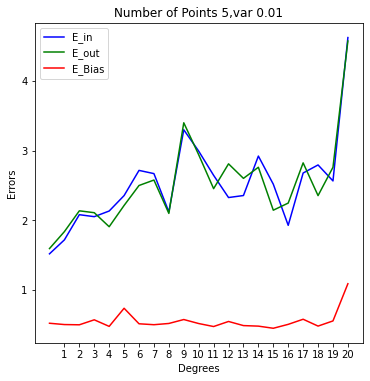

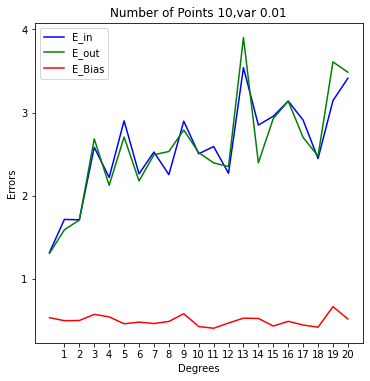

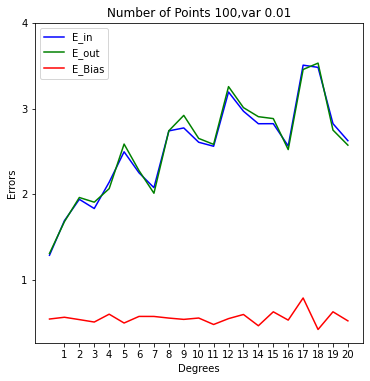

In [ ]:
N = [5,10,100]

for i in range(len(N)):
    plt.figure(figsize=(20, 20)) 
    plt.subplot(3,len(N),3)
    df_new = df[(df['N']==N[i]) & (df['variance']== 0.01)]
    ein = df_new['e_in'] 
    eout = df_new['e_out']
    ebias = df_new['e_bias']
    degree = df_new['d']
    plt.plot(degree, ein, color='b', label="E_in")
    plt.plot(degree, eout, color='g', label="E_out")
    plt.plot(degree, ebias, 'r',label="E_Bias")
    plt.xticks(np.arange(1, 21, step=1))
    plt.yticks(np.arange(1, 5, step=1))
    plt.xlabel("Degrees")
    plt.ylabel("Errors")
    plt.legend()
    plt.title("Number of Points {},var {}".format(N[i],0.01))
    plt.show()
    

#### As the number of points (N) increase we can see the E_in and E_out are increasing, however, E_bias is low.

### Number of points Vs Error (Var = 1) - Without Regularization

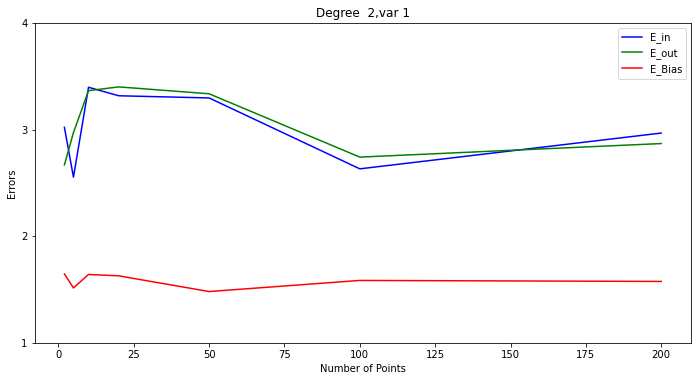

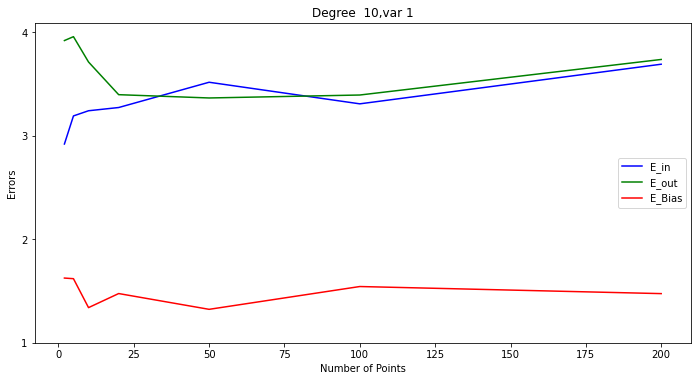

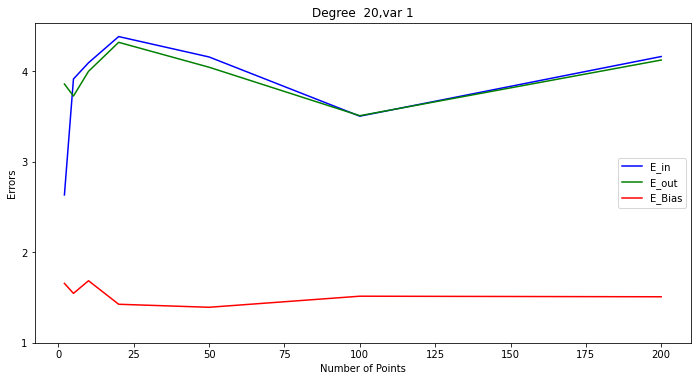

In [ ]:
d = [2,10,20]

for i in range(len(d)):
    plt.figure(figsize=(40, 20))  
    plt.subplot(3,len(N),3)
    df_new = df[(df['d']==d[i]) & (df['variance']== 1)]
    ein = df_new['e_in'] 
    eout = df_new['e_out']
    ebias = df_new['e_bias']
    degree = df_new['N']
    plt.plot(degree, ein, color='b', label="E_in")
    plt.plot(degree, eout, color='g', label="E_out")
    plt.plot(degree, ebias, 'r',label="E_Bias")
    plt.yticks(np.arange(1, 5, step=1))
    plt.xlabel("Number of Points")
    plt.ylabel("Errors")
    plt.legend()
    plt.title("Degree  {},var {}".format(d[i],1))
    plt.show()

#### Initially the error is high, however as the number of points increases we can see a decrease in the error

### Number of points Vs Error (Var = 0.0001) - Without Regularization

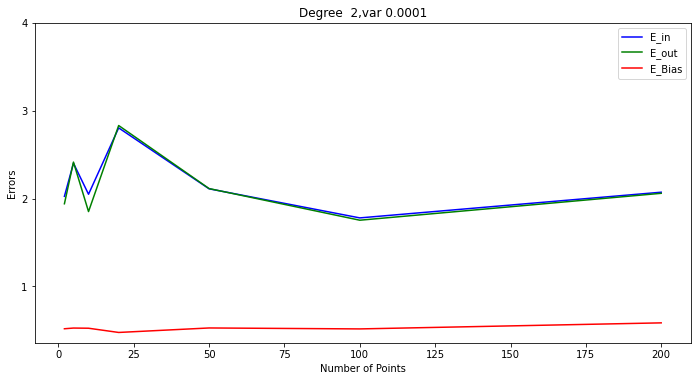

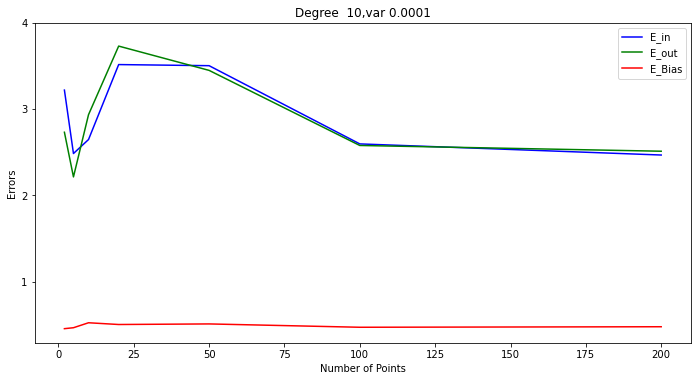

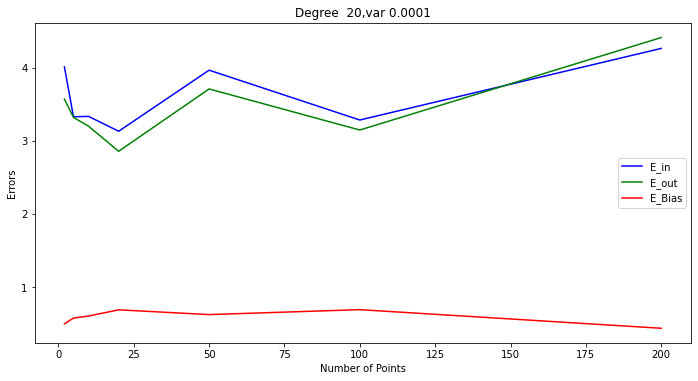

In [ ]:
d = [2,10,20]

for i in range(len(d)):
    plt.figure(figsize=(40, 20))  
    plt.subplot(3,len(N),3)
    df_new = df[(df['d']==d[i]) & (df['variance']== 0.0001)]
    ein = df_new['e_in'] 
    eout = df_new['e_out']
    ebias = df_new['e_bias']
    degree = df_new['N']
    plt.plot(degree, ein, color='b', label="E_in")
    plt.plot(degree, eout, color='g', label="E_out")
    plt.plot(degree, ebias, 'r',label="E_Bias")
    plt.yticks(np.arange(1, 5, step=1))
    plt.xlabel("Number of Points")
    plt.ylabel("Errors")
    plt.legend()
    plt.title("Degree  {},var {}".format(d[i],0.0001))
    plt.show()

#### In these plots, we observe that, with a decrease in variance from 1 to 0.0001 we can see a better stabilization with variance = 0.0001, however the E_in and E_out are increasing.

## Part - F           Weight Decay Regularization 

In [ ]:
def y_function(N,var):
    x = np.random.uniform(size = N)
    z = np.random.normal(size = N, scale = var, loc = 0.0)
    y = np.cos(2*pi*x)
    y_ = y + z
    return x,y_


In [ ]:
def getData(N, var):
    x,y = y_function(N,var)
    return x,y

In [ ]:
def reg_model(a,x):#a is the vector with the constant values, #d is the polynomial degree
    y_reg = 0
    for i in range(a.shape[0]):
        y_reg += a[i] * x ** i
    return y_reg

In [ ]:
#run this
def getMSE(a,x,y):
    y_pred = reg_model(a,x)
    mse_value = mean_squared_error(y,y_pred) #y is actual value and y1 is predicted value
    return mse_value

In [ ]:
def fitdata_regularization(a,x,y,weight_decay = 0.0):
    l1_value = 0
    n = x.shape[0]
    l1_value = np.sum(abs(w))
    return getMSE(a,x,y) + (1/n * weight_decay/2 * l1_value)
    

In [ ]:
#run this

def fitData(x,y,d,var,w_decay = 0.0):
    learn_rate = 0.01
    precision = 0.0001 #This tells us when to stop the algorithm
    previous_step_size = 0 #
    max_iters = 5000 # maximum number of iterations
    iters = 0 #iteration counter
    a = np.random.normal(size=(d+1)) 
    grad1 = grad(fitdata_regularization)
    
    
    while previous_step_size > precision and iters < max_iters:
        a1 = a
        gradient = grad1(a1,x,y,w_decay)
        a = a - (gradient * learn_rate)
        previous_step_size = abs(a -a1)
        iters = iters+1
    e_in = fitdata_regularization(a,x,y,w_decay) # compute MSE for training set

    x_test, y_test = getData(1000, var) # generate new testing set of size 1000
    e_out = fitdata_regularization(a, x_test, y_test,w_decay) # compute MSE for the new testing set

    return a, e_in, e_out


In [ ]:
def experiment(N,d,var,w_decay =0.0):
    M=50
    E_i , E_o = [], []
    a_poly = None
    
    for i in range(M): 
        X,y = getData(N,var)
        a, E_in, E_out = fitData(X,y,d,var,w_decay)
        E_i.append(E_in)
        E_o.append(E_out)
        if a_poly is None:
            a_poly = a
        else:
            a_poly+=a
    e_in_bar = np.mean(E_i)
    e_out_bar = np.mean(E_o)
    a_poly_bar = a_poly/M
    x_large, y_large = getData(1000,var)
    e_bias = getMSE(a_poly_bar,x_large,y_large)
    
    return e_in_bar,e_out_bar, e_bias
        
        
        


In [ ]:
N = [2, 5, 10, 20, 50, 100, 200]
d=[i for i in range(21)]
sigma = [0.01,0.1,1]
var = [i**2 for i in sigma]
var =[0.0001,0.01,1]
weight_decay = [0.01,0.02,0.03]
df = pd.DataFrame(columns = ['N','d','variance','weight_decay','e_in','e_out','e_bias'])
lst =[]
for i in N:
    for j in d:
        for k in var:
            for w in weight_decay:
                e_in, e_out,e_bias = experiment(i,j,k,w)
                df = df.append(pd.DataFrame({'N':[i],'d':[j],'variance':[k],'weight_decay':[w],'e_in':[e_in],'e_out':[e_out],'e_bias':[e_bias]}),ignore_index=True)
            
            

In [ ]:
df.head()

### Plot of 'Degree vs Error' (Var = 0.0001) - With Regularization

In [ ]:

N = [5,10,100]
for i in range(len(N)):
    plt.figure(figsize=(20, 20)) 
    plt.subplot(3,len(N),3)
    df_new = df[(df['N']==N[i]) & (df['variance']== 0.0001)]
    ein = df_new['e_in'] 
    eout = df_new['e_out']
    ebias = df_new['e_bias']
    degree = df_new['d']
    plt.plot(degree, ein, color='b', label="E_in")
    plt.plot(degree, eout, color='g', label="E_out")
    plt.plot(degree, ebias, 'r',label="E_Bias")
    plt.xticks(np.arange(1, 21, step=1))
    plt.yticks(np.arange(1, 5, step=1))
    plt.xlabel("Degrees")
    plt.ylabel("Errors")
    plt.legend()
    plt.title("Number of points {},var {}".format(N[i],0.0001))
    plt.show()

### Plot of 'Degree vs Error' (Var = 0.01) - With Regularization

In [ ]:
N = [5,10,100]

for i in range(len(N)):
    plt.figure(figsize=(20, 20)) 
    plt.subplot(3,len(N),3)
    df_new = df[(df['N']==N[i]) & (df['variance']== 0.01)]
    ein = df_new['e_in'] 
    eout = df_new['e_out']
    ebias = df_new['e_bias']
    degree = df_new['d']
    plt.plot(degree, ein, color='b', label="E_in")
    plt.plot(degree, eout, color='g', label="E_out")
    plt.plot(degree, ebias, 'r',label="E_Bias")
    plt.xticks(np.arange(1, 21, step=1))
    plt.yticks(np.arange(1, 5, step=1))
    plt.xlabel("Degrees")
    plt.ylabel("Errors")
    plt.legend()
    plt.title("Number of Points {},var {}".format(N[i],0.01))
    plt.show()
    

### Plot of 'Degree vs Error' (Var = 1) - With Regularization

In [ ]:

N = [5,10,100]
for i in range(len(N)):
    plt.figure(figsize=(20, 20))  
    plt.subplot(3,len(N),3)
    df_new = df[(df['N']==N[i]) & (df['variance']== 1)]
    ein = df_new['e_in'] 
    eout = df_new['e_out']
    ebias = df_new['e_bias']
    degree = df_new['d']
    plt.plot(degree, ein, color='b', label="E_in")
    plt.plot(degree, eout, color='g', label="E_out")
    plt.plot(degree, ebias, 'r',label="E_Bias")
    plt.xticks(np.arange(1, 21, step=1))
    plt.yticks(np.arange(1, 5, step=1))
    plt.xlabel("Degrees")
    plt.ylabel("Errors")
    plt.legend()
    plt.title("Number of Points  {},var {}".format(N[i],1))
    plt.show()

#### If you observe the above 3 set of plots, with the increase in variance (0.0001 - 0.01 - 1) we can see an increase in E_bias 

### Number of points Vs Error (Var = 1) - With Regularization

In [ ]:
d = [2,10,20]

for i in range(len(d)):
    plt.figure(figsize=(40, 20))  
    plt.subplot(3,len(N),3)
    df_new = df[(df['d']==d[i]) & (df['variance']== 1)]
    ein = df_new['e_in'] 
    eout = df_new['e_out']
    ebias = df_new['e_bias']
    degree = df_new['N']
    plt.plot(degree, ein, color='b', label="E_in")
    plt.plot(degree, eout, color='g', label="E_out")
    plt.plot(degree, ebias, 'r',label="E_Bias")
    plt.yticks(np.arange(1, 5, step=1))
    
    plt.xlabel("Number of Points")
    plt.ylabel("Errors")
    plt.legend()
    plt.title("Degree  {},var {}".format(d[i],1))
    plt.show()

#### As the degree (d) is increasing we can see a stabilizaation with E_in, E_out as the Number of points increases

### Number of points Vs Error (Var = 0.0001) - With Regularization

In [ ]:
d = [2,10,20]

for i in range(len(d)):
    plt.figure(figsize=(40, 20))  
    plt.subplot(3,len(N),3)
    df_new = df[(df['d']==d[i]) & (df['variance']== 0.0001)]
    ein = df_new['e_in'] 
    eout = df_new['e_out']
    ebias = df_new['e_bias']
    degree = df_new['N']
    plt.plot(degree, ein, color='b', label="E_in")
    plt.plot(degree, eout, color='g', label="E_out")
    plt.plot(degree, ebias, 'r',label="E_Bias")
    plt.yticks(np.arange(1, 5, step=1))
    plt.xlabel("Number of Points")
    plt.ylabel("Errors")
    plt.legend()
    plt.title("Degree  {},var {}".format(d[i],0.0001))
    plt.show()

#### With decrease in variance we can observe the curve is converging faster. 

We can observe from the plots that with the addition of regularization term there is sharp rise and fall with the x-axis, where as we can observe a smoother curve without regularization. This, tends to convey that with addition of regularization the model is trying to stabilise